In [1]:
%run ../basesetup.ipynb 

# Directory containing result files
results_dir = "/vol/ideadata/ed52egek/pycharm/trichotomy/importantmodels/results_chexnet_real"

# Initialize data storage
categories = [
    "AUROC mean",
    "No Finding",
    "Atelectasis",
    "Cardiomegaly",
    "Consolidation",
    "Edema",
    "Pleural Effusion",
    "Pneumonia",
    "Pneumothorax",
]
data = {}#{category: {} for category in categories}

# Process each result file
for result_file in os.listdir(results_dir):
    if result_file.endswith(".txt"):
        model_name = result_file.split("_")[1].replace("train", "").strip()
        test_name = result_file.split("_")[2].replace("test", "").replace(".txt", "").strip()
        
        if data.get(model_name) is None: 
            data[model_name] = {}
        if data[model_name].get(test_name) is None: 
            data[model_name][test_name] = {}

        with open(os.path.join(results_dir, result_file), "r") as f:
            lines = f.readlines()
            for line in lines:  # Skip the first two lines
                category, value = line.split(":")
                category = category.strip()
                value = float(value.strip())
                data[model_name][test_name][category] = value
import pandas as pd

# Convert data dictionary to a DataFrame
rows = []
for model_name, models in data.items():
    for test_name, metrics in models.items():
        for category, value in metrics.items():
            rows.append({
                "test": test_name,
                "model": model_name,
                "category": category,
                "AUROC": value
            })

# Create the DataFrame
df = pd.DataFrame(rows)
df.to_csv("real_results.csv")
df

,test,model,category,AUROC
0,mimic,mimic,AUROC mean,0.827066
1,mimic,mimic,No Finding,0.889816
2,mimic,mimic,Atelectasis,0.722820
3,mimic,mimic,Cardiomegaly,0.790564
4,mimic,mimic,Consolidation,0.808375
...,...,...,...,...
76,chexpert,chexpert,Consolidation,0.695478
77,chexpert,chexpert,Edema,0.801860
78,chexpert,chexpert,Pleural Effusion,0.860439
79,chexpert,chexpert,Pneumonia,0.752586


In [2]:
str_out = ""
for train in ["cxr8", "mimic", "chexpert"]:
    for test in ["cxr8", "mimic", "chexpert"]:
        str_out += f"{float(df[(df['model'] == train) & (df['test'] == test)& (df['category'] == 'AUROC mean')]['AUROC'])*100:2.2f} &"

str_out = str_out[:-1] + r"\\"
print(str_out)


85.41 &77.07 &74.18 &81.78 &82.71 &76.23 &79.62 &76.98 &79.99 \\


/tmp/ipykernel_340821/3798517470.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  str_out += f"{float(df[(df['model'] == train) & (df['test'] == test)& (df['category'] == 'AUROC mean')]['AUROC'])*100:2.2f} &"


In [3]:
df[(df['model'] == train) & (df['test'] == test)& (df['category'] == 'AUROC mean')]["AUROC"]

72    0.799937
Name: AUROC, dtype: float64

KeyboardInterrupt: 

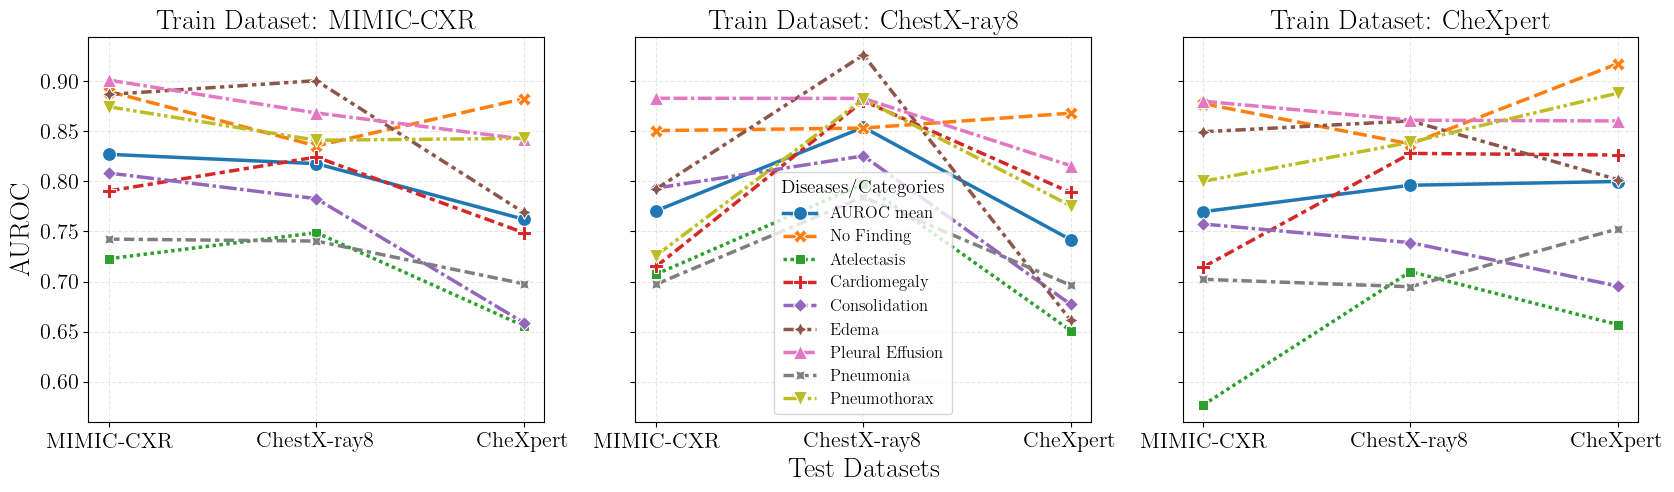

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
categories = [cat for cat in df["category"].unique()]
palette = sns.color_palette("tab10", len(categories))
test_datasets = list(ds_to_viz.keys())

df["test_display"] = df["test"].map(ds_to_viz)

base_fontsize = 20
legend_fontsize = 12  # Legend font size
xtick_fontsize = 18  # X-axis tick font size
line_width = 2.5  # Line thickness
marker_size = 10  # Marker size

for i, model in enumerate(df["model"].unique()):
    ax = axes[i]

    sns.lineplot(
        data=df[df["model"] == model], 
        x="test_display", 
        y="AUROC", 
        hue="category", 
        style="category",
        markers=True,
        dashes=True,
        linewidth=line_width,  # Adjust line width
        ax=ax,
        markersize=marker_size,  # Adjust marker size
    )

    ax.set_title(f"Train Dataset: {ds_to_viz[model]}", fontsize=base_fontsize, fontweight="bold")

    # Update font size of x-tick labels
    ax.tick_params(axis='x', labelsize=xtick_fontsize - 2)
    ax.tick_params(axis='y', labelsize=xtick_fontsize - 2)

    if i == 1:
        ax.set_xlabel("Test Datasets", fontsize=base_fontsize)
    else:
        ax.set_xlabel("")

    if i == 0:
        ax.set_ylabel("AUROC", fontsize=base_fontsize)
    else:
        ax.set_ylabel("")
    ax.grid(True, linestyle="--", alpha=0.3)

    # Adjust legend font size
    if i == 1:  # Show legend only for the first subplot
        legend = ax.legend(title="Diseases/Categories", fontsize=legend_fontsize, loc="lower center", title_fontsize=legend_fontsize + 2)
    else:
        ax.legend().remove()

plt.tight_layout()
plt.savefig("Realdataoutput.pdf")
plt.show()